# Problem Statement

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same populat

## Objectives
### Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.


Dataset:

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

T
rain_Dataa
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy 0%.ion.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introductory Steps

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

#import graphics libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install scikeras

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# Test Data

In [ ]:
# import data
data_test = pd.read_csv("/content/drive/MyDrive/Hackathon - Shinkansen Travel/Surveydata_test.csv")

In [ ]:
df_test = data_test.copy()

In [ ]:
df_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test.shape

(35602, 16)

### Observations
There are 35602 entries in the test dataset with 16 features

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

### Observations:
There is one numeric feature (**ID**) and 15 object/categorical features. There are also **null values** present as evidenced by less than 35602 for most features, **except Seat_Class**.

In [ ]:
df_test.isnull().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

### Observations
Most features have null values. **Arrival Time**, **Catering**, and **Onboard_Service** have several thousand missing values. **ID** is probably unique for each entry and will be removed.

In [ ]:
df_test.nunique(axis = 0)

ID                         35602
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
dtype: int64

### Observations
The number of ID's equals the number of entries. Again, this column will be deleted as it has not predictive quality. Most of the features have 5 or 6 options the passengers could choose from. **Seat_Class** has only 2 options.

# Training Data

In [ ]:
# import data
data_train = pd.read_csv("/content/drive/MyDrive/Hackathon - Shinkansen Travel/Surveydata_train.csv")

In [ ]:
df_train = data_train.copy()

In [ ]:
df_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train.shape

(94379, 17)

### Observations
There are 94,379 entries in the training data set, with 17 variables, including the target variable

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

### Observations:
Our training data includes two numeric features, **ID** and **Overall_Experience**. Overall_Experience is the target variable, with 1 equalling 'satisfied' and 0 equalling 'not satisfied'.

In [ ]:
df_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### Observations
Three variables, **Arrival_Time_Convenient**, **Catering**, and **Onboard_Service**, all have several thousand missing values. Most others have less than 100 missing values, with **Seat_Class** and **Overall_Experience** having no missing values. Seat_Class may have been pre-populated with the distribution of the survey.

In [ ]:
df_train.nunique(axis = 0)

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

Most variables have 6 options a passenger could have chosen from. **Seat_Class** and the target **Overall_Experience** has only 2. **Baggage Handling** has 5. This number of unique values in the training set is different than the test set, which had more 5's. This could be something to explore.

In [ ]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Seat_Comfort,94318,6,Acceptable,21158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,94379,2,Green Car,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time_Convenient,85449,6,Good,19574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,85638,6,Acceptable,18468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_Location,94349,6,Manageable,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Wifi_Service,94349,6,Good,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Entertainment,94361,6,Good,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Support,94288,6,Good,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## 1.0 Univariate Analysis

#### (Target Variable: Overall Experience)

1    51593
0    42786
Name: Overall_Experience, dtype: int64


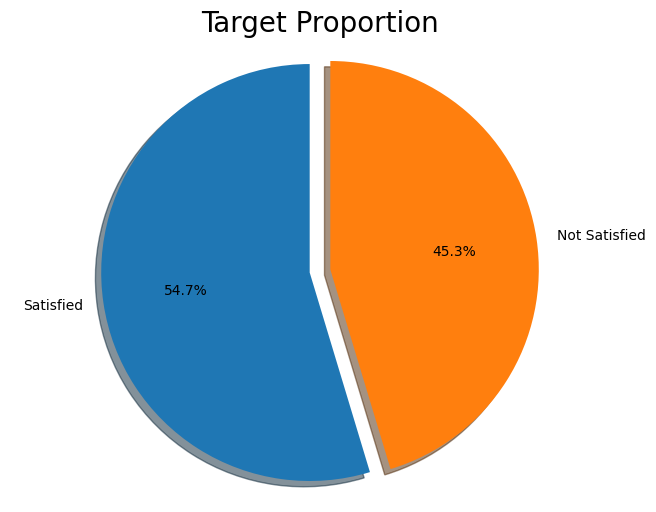

In [ ]:
print(df_train.Overall_Experience.value_counts())
labels = 'Satisfied', 'Not Satisfied'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [df_train.Overall_Experience[df_train['Overall_Experience']==1].count(),df_train.Overall_Experience[df_train['Overall_Experience']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8,6 ))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Target Proportion", size = 20)
plt.show()

### Observation
Customer experience was only slightly more positive and this difference may not be a statistically significant amount. The satisfication result is roughly divided between satisfied (54.7%) and not satisfied (45.3%). This seems nearly haphazard. A deeper look into multivariate comparisons may provide some insights to influencing factors.

#### 1.1 Seat Comfort

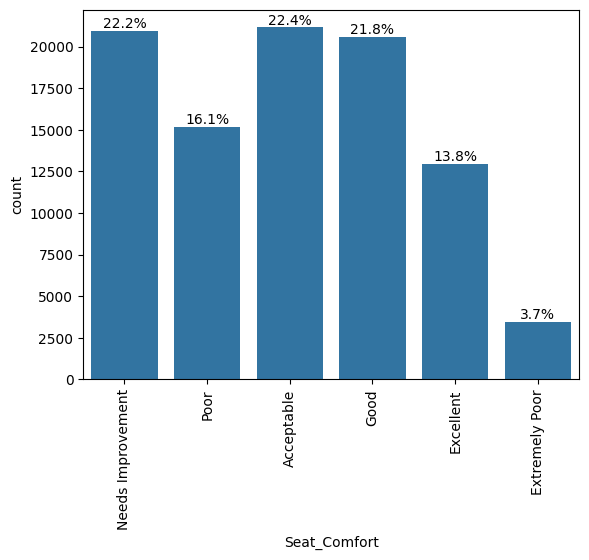

In [ ]:
ax = sns.countplot(data=df_train, x = 'Seat_Comfort')

# Annotate percentages
total = df_train['Seat_Comfort'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax.tick_params(axis='x', labelrotation=90)

### Observations
Seat Comfort values of **Needs_Improvement**, **Acceptable**, and **Good** were nearly tied for votes at about 22% each. **Poor** and **Excellent** were similar at 16 and ~14% each. **Extremely_Poor** received the least votes with 3.7%.

#### 1.2 Seat_Class

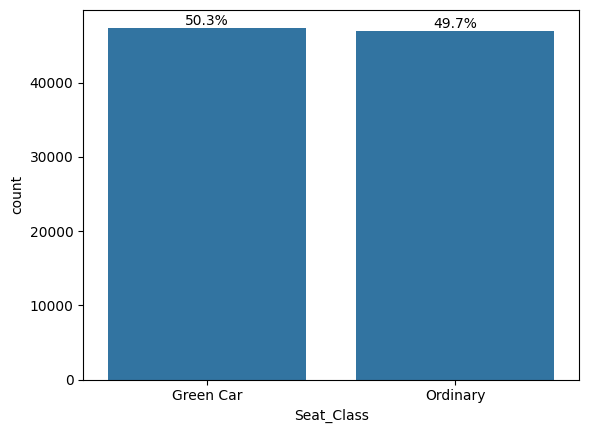

In [ ]:
ax = sns.countplot(data=df_train, x = 'Seat_Class')

# Annotate percentages
total = df_train['Seat_Class'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%');

### Observations
Seat Class results: The passengers were divided equally between Green Car and Ordinary

#### 1.3 Arrival Time Convenient

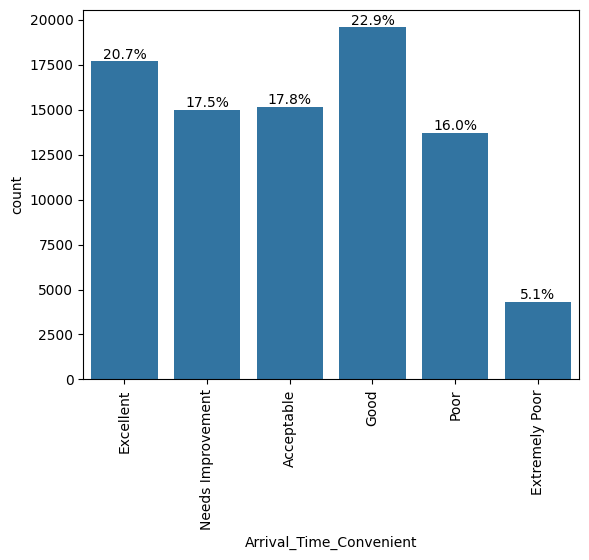

In [ ]:
ax = sns.countplot(data=df_train, x = 'Arrival_Time_Convenient')

# Annotate percentages
total = df_train['Arrival_Time_Convenient'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax.tick_params(axis='x', labelrotation=90)

### Observations
The company rates fairly well with **Arrival Time**, as Excellent and Good received the highest ratings. Extremely Poor received the least votes.

#### 1.4 Catering

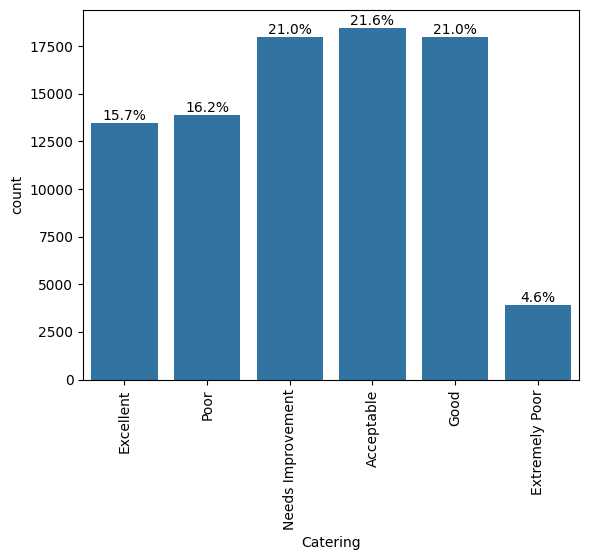

In [ ]:
ax = sns.countplot(data=df_train, x = 'Catering')

# Annotate percentages
total = df_train['Catering'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%');
ax.tick_params(axis='x', labelrotation=90)

### Observations
Catering did not have strong pulls among any values, falling somewhat in the middle with Needs Improvement, Acceptable, and Good. Extremely Poor received few votes.

#### Remaining Univariate Analysis:

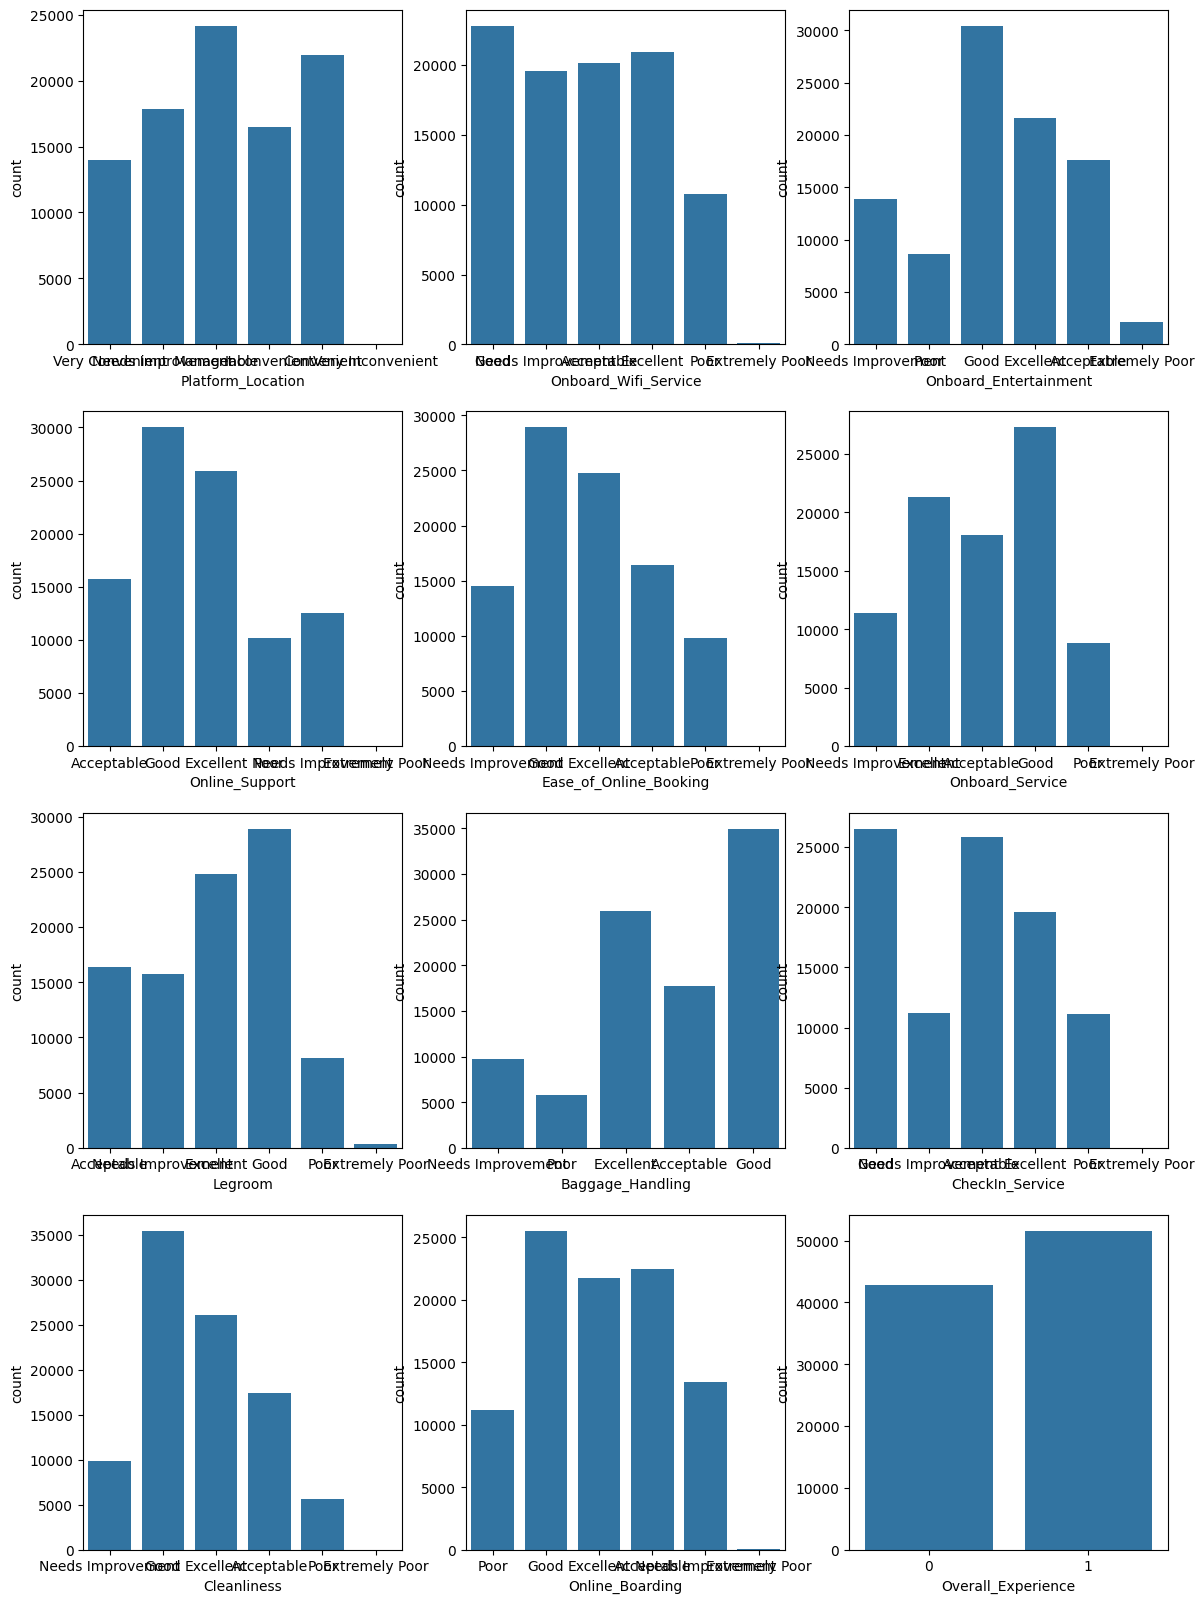

In [ ]:
fig, ax = plt.subplots(4,3, figsize=(14,20));

sns.countplot(df_train, x = 'Platform_Location', ax = ax[0,0])
sns.countplot(df_train, x = 'Onboard_Wifi_Service', ax = ax[0,1])
sns.countplot(df_train, x = 'Onboard_Entertainment', ax = ax[0,2])
sns.countplot(df_train, x = 'Online_Support', ax = ax[1,0])
sns.countplot(df_train, x = 'Ease_of_Online_Booking', ax = ax[1,1])
sns.countplot(df_train, x = 'Onboard_Service', ax = ax[1,2])
sns.countplot(df_train, x = 'Legroom', ax = ax[2,0])
sns.countplot(df_train, x = 'Baggage_Handling', ax = ax[2,1])
sns.countplot(df_train, x = 'CheckIn_Service', ax = ax[2,2])
sns.countplot(df_train, x = 'Cleanliness', ax = ax[3,0])
sns.countplot(df_train, x = 'Online_Boarding', ax = ax[3,1])
sns.countplot(df_train, x = 'Overall_Experience', ax = ax[3,2])
plt.show()

### Observations
The remaining variables seems to have a pretty good mix among the values showing that they can all potentially be predictive in nature. Only **Onboard_Wifi_Service** seems to have an approximately flat graph, suggesting this may not have been predictive. We will look at it more closely in multivariate analysis.

## 2.0 Multivariate Analysis

#### 2.1 Target + Seat Comfort

Overall_Experience         0         1
Seat_Comfort                          
Acceptable          0.646044  0.353956
Excellent           0.007401  0.992599
Extremely Poor      0.002310  0.997690
Good                0.348677  0.651323
Needs Improvement   0.642796  0.357204
Poor                0.549160  0.450840


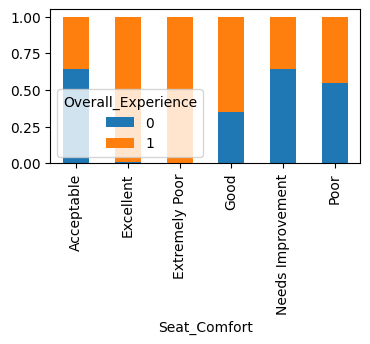

In [ ]:
seat = pd.crosstab(df_train['Seat_Comfort'], df_train['Overall_Experience'], normalize = 'index')
print(seat)
seat.plot(kind = 'bar', stacked=True, figsize = (4,2));

### Observations
An interesting result in Seat_Comfort shows that both **Excellent** and **Extremely Poor** were unanimously selected by satisfied passengers. These two values may have little predictive value. We will look at deleting these two values in a trial model.

#### 2.2 Target + Seat Class

Overall_Experience        0        1
Seat_Class                          
Green Car           0.45186  0.54814
Ordinary            0.45484  0.54516


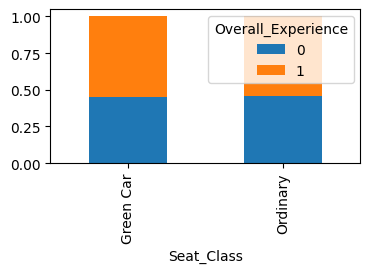

In [ ]:
seat_class = pd.crosstab(df_train['Seat_Class'], df_train['Overall_Experience'], normalize = 'index')
print(seat_class)
seat_class.plot(kind = 'bar', stacked=True, figsize = (4,2));

### Observations
For Seat Class, there is no difference in satisfaction percentages between **Green Car** and **Ordinary**. We will consider deleting this variable as it may have not predictive value. Similarly, the passengers were evenly divided between Green Car and Ordinary, further validating a possible reason to exclue this variable.

#### 2.3 Target + Arrival Time Convenient

Overall_Experience              0         1
Arrival_Time_Convenient                    
Acceptable               0.464519  0.535481
Excellent                0.444809  0.555191
Extremely Poor           0.457295  0.542705
Good                     0.475478  0.524522
Needs Improvement        0.463776  0.536224
Poor                     0.411773  0.588227


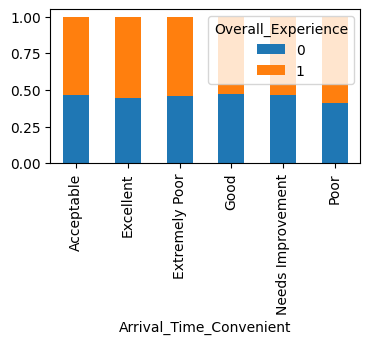

In [ ]:
arr_time = pd.crosstab(df_train['Arrival_Time_Convenient'], df_train['Overall_Experience'], normalize = 'index')
print(arr_time)
arr_time.plot(kind = 'bar', stacked=True, figsize = (4,2));

### Observations
There was little difference in the percentage of votes between the values in Arrival_Time Convenient. This may not be a predictive variable and we will consider deleting it in a trial model.

#### 2.4 Catering and Overall Experience

Overall_Experience         0         1
Catering                              
Acceptable          0.572558  0.427442
Excellent           0.218878  0.781122
Extremely Poor      0.224808  0.775192
Good                0.411876  0.588124
Needs Improvement   0.568806  0.431194
Poor                0.491702  0.508298


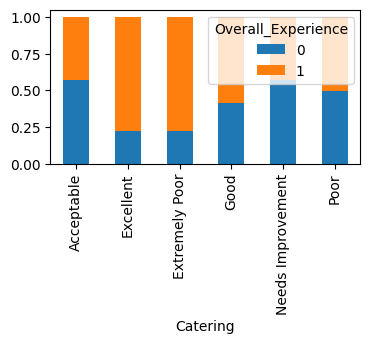

In [ ]:
cater = pd.crosstab(df_train['Catering'], df_train['Overall_Experience'], normalize = 'index')
print(cater)
cater.plot(kind = 'bar', stacked=True, figsize = (4,2));

### Observations
For Catering, Acceptable and Needs Improvement rated higher among dissatisfied passengers. There is a potential that this might differentiate satisfaction levels. Interesting, Excellent and Extremely Poor both received lots of votes from satisfied passengers. These two values may not have predictive value and we will consider deleting them in a trial model.

#### 2.5 Remaining Features + Target

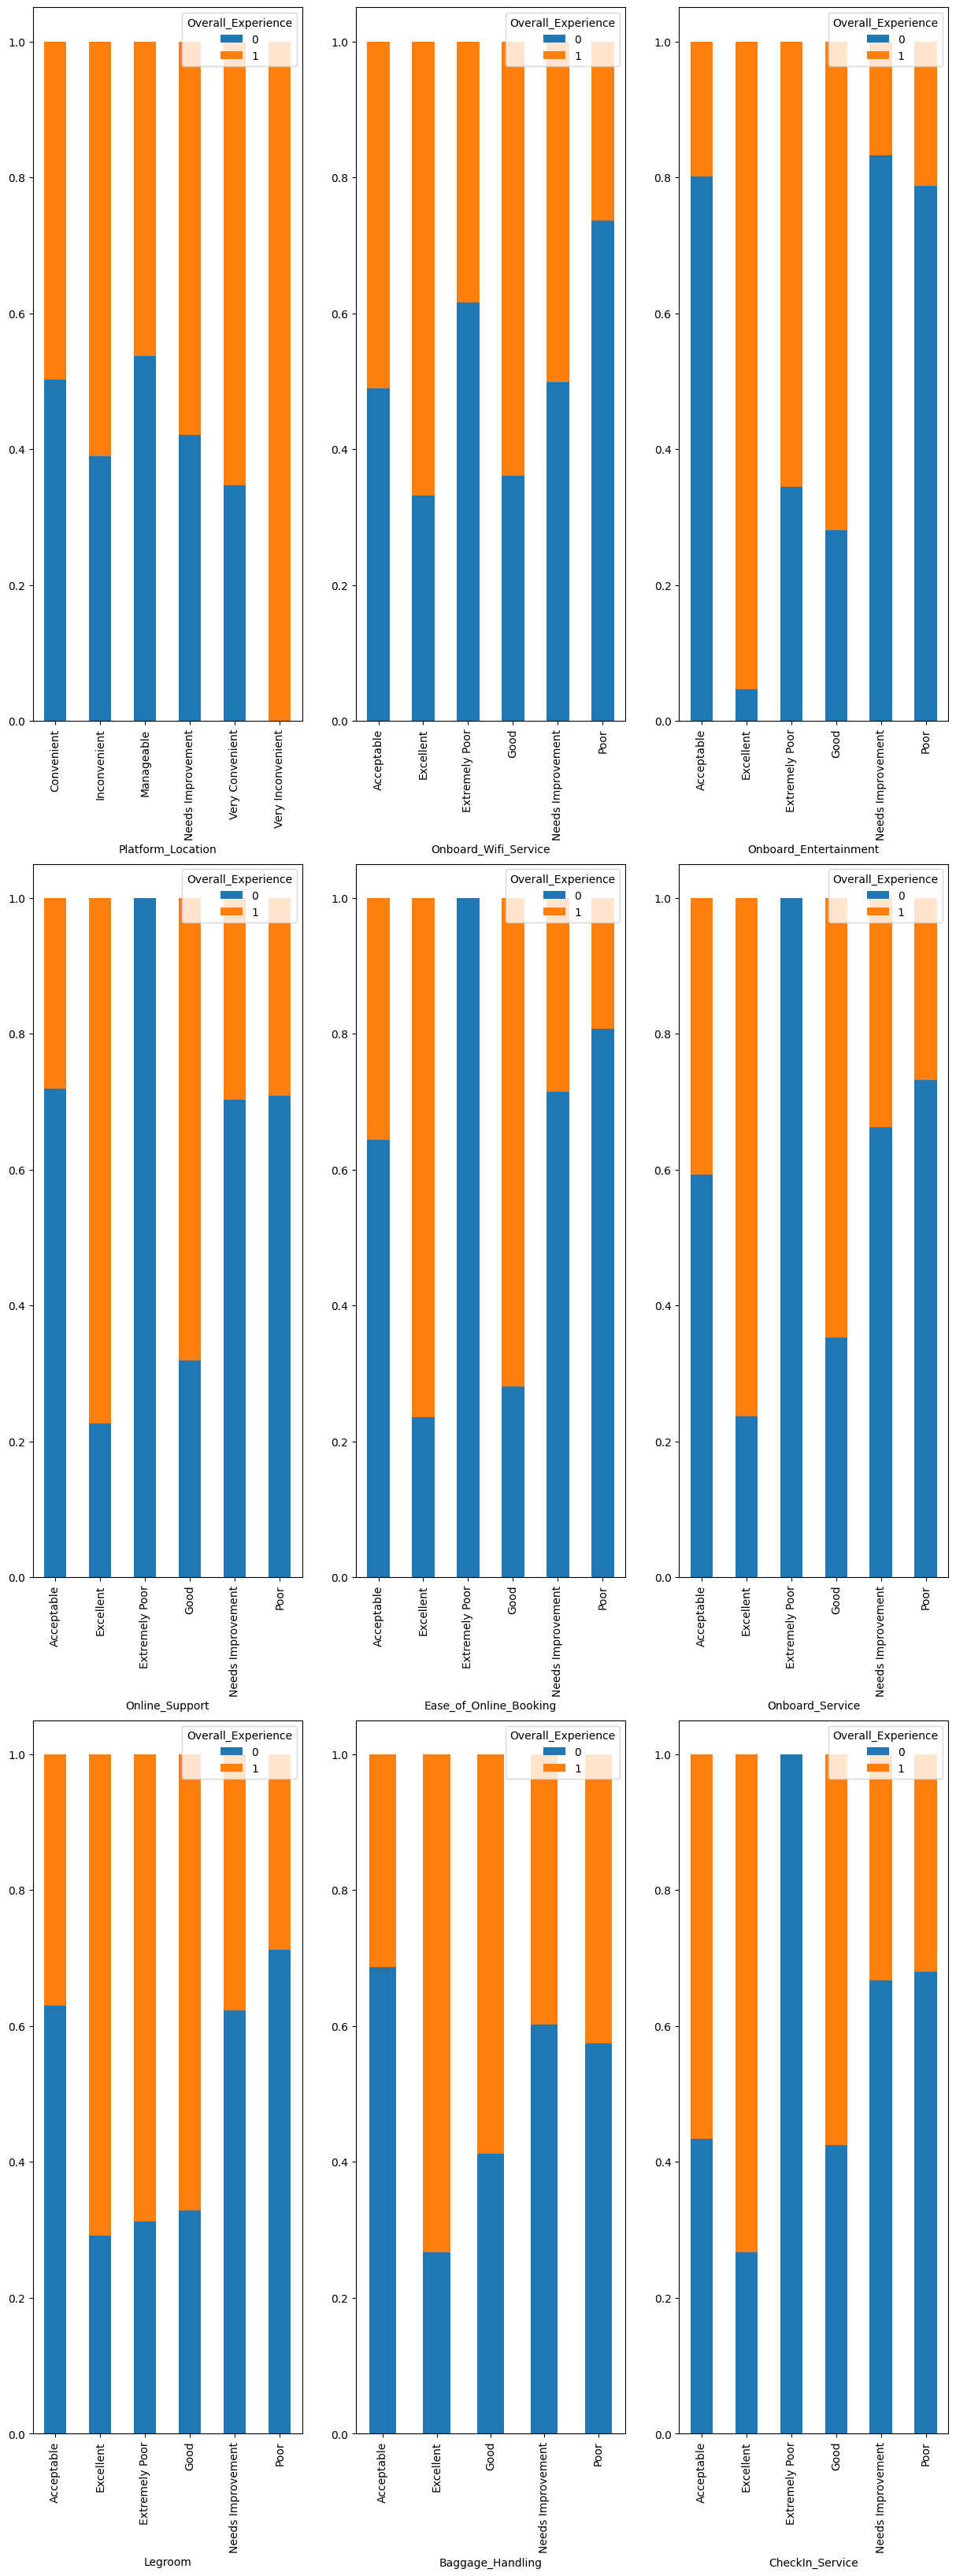

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15, 40));

platform = pd.crosstab(df_train['Platform_Location'], df_train['Overall_Experience'], normalize = 'index')
platform.plot(kind = 'bar', stacked=True, ax = ax[0,0]);
wifi = pd.crosstab(df_train['Onboard_Wifi_Service'], df_train['Overall_Experience'], normalize = 'index')
wifi.plot(kind = 'bar', stacked=True, ax = ax[0,1]);
entertain = pd.crosstab(df_train['Onboard_Entertainment'], df_train['Overall_Experience'], normalize = 'index')
entertain.plot(kind = 'bar', stacked=True, ax = ax[0,2]);
support = pd.crosstab(df_train['Online_Support'], df_train['Overall_Experience'], normalize = 'index')
support.plot(kind = 'bar', stacked=True, ax = ax[1,0]);
booking = pd.crosstab(df_train['Ease_of_Online_Booking'], df_train['Overall_Experience'], normalize = 'index')
booking.plot(kind = 'bar', stacked=True, ax = ax[1,1]);
service = pd.crosstab(df_train['Onboard_Service'], df_train['Overall_Experience'], normalize = 'index')
service.plot(kind = 'bar', stacked=True, ax = ax[1,2]);
legroom = pd.crosstab(df_train['Legroom'], df_train['Overall_Experience'], normalize = 'index')
legroom.plot(kind = 'bar', stacked=True, ax = ax[2,0]);
baggage = pd.crosstab(df_train['Baggage_Handling'], df_train['Overall_Experience'], normalize = 'index')
baggage.plot(kind = 'bar', stacked=True, ax = ax[2,1]);
checkin = pd.crosstab(df_train['CheckIn_Service'], df_train['Overall_Experience'], normalize = 'index')
checkin.plot(kind = 'bar', stacked=True, ax = ax[2,2]);

plt.show()



### Observations
The remaining comparisons seem to have differentiability between values when comparing satisfied to dissatisfied customers.

## Split the Data

In [ ]:
## Separating Independent and Dependent Columns
X = df_train.drop(['Overall_Experience'],axis=1)
Y = df_train[['Overall_Experience']]

In [ ]:
Y.head()

,Overall_Experience
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [ ]:
X_train.isnull().sum()

ID                            0
Seat_Comfort                 51
Seat_Class                    0
Arrival_Time_Convenient    7120
Catering                   6939
Platform_Location            22
Onboard_Wifi_Service         22
Onboard_Entertainment        14
Online_Support               70
Ease_of_Online_Booking       56
Onboard_Service            6006
Legroom                      74
Baggage_Handling            116
CheckIn_Service              61
Cleanliness                   5
Online_Boarding               5
dtype: int64

In [ ]:
# drop ID column
X_train.drop(columns="ID", inplace=True)
X_test.drop(columns="ID", inplace=True)

In [ ]:
X_train.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
85573,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Excellent


In [ ]:
X_test.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
13485,Good,Green Car,Good,Good,Convenient,Good,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Acceptable,Good,Needs Improvement,Acceptable,Needs Improvement


## Missing Value Imputation

We will impute the missing values in columns using their mode.

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
X_train[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment","Online_Support", "Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness","Online_Boarding"]] = imputer_mode.fit_transform(
    X_train[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment","Online_Support", "Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness","Online_Boarding"]])

X_test[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment","Online_Support", "Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness","Online_Boarding"]] = imputer_mode.transform(
    X_test[["Seat_Comfort","Arrival_Time_Convenient","Catering","Platform_Location","Onboard_Wifi_Service","Onboard_Entertainment","Online_Support", "Ease_of_Online_Booking","Onboard_Service","Legroom","Baggage_Handling","CheckIn_Service","Cleanliness","Online_Boarding"]])

In [ ]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64
------------------------------
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


## Encoding Categorical Columns

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Seat_Comfort']= labelencoder_RE.fit_transform(X_train['Seat_Comfort'])
X_test['Seat_Comfort']= labelencoder_RE.transform(X_test['Seat_Comfort'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Seat_Class']= labelencoder_RE.fit_transform(X_train['Seat_Class'])
X_test['Seat_Class']= labelencoder_RE.transform(X_test['Seat_Class'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Arrival_Time_Convenient']= labelencoder_RE.fit_transform(X_train['Arrival_Time_Convenient'])
X_test['Arrival_Time_Convenient']= labelencoder_RE.transform(X_test['Arrival_Time_Convenient'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Catering']= labelencoder_RE.fit_transform(X_train['Catering'])
X_test['Catering']= labelencoder_RE.transform(X_test['Catering'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Platform_Location']= labelencoder_RE.fit_transform(X_train['Platform_Location'])
X_test['Platform_Location']= labelencoder_RE.transform(X_test['Platform_Location'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Onboard_Wifi_Service']= labelencoder_RE.fit_transform(X_train['Onboard_Wifi_Service'])
X_test['Onboard_Wifi_Service']= labelencoder_RE.transform(X_test['Onboard_Wifi_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Onboard_Entertainment']= labelencoder_RE.fit_transform(X_train['Onboard_Entertainment'])
X_test['Onboard_Entertainment']= labelencoder_RE.transform(X_test['Onboard_Entertainment'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Online_Support']= labelencoder_RE.fit_transform(X_train['Online_Support'])
X_test['Online_Support']= labelencoder_RE.transform(X_test['Online_Support'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Ease_of_Online_Booking']= labelencoder_RE.fit_transform(X_train['Ease_of_Online_Booking'])
X_test['Ease_of_Online_Booking']= labelencoder_RE.transform(X_test['Ease_of_Online_Booking'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Onboard_Service']= labelencoder_RE.fit_transform(X_train['Onboard_Service'])
X_test['Onboard_Service']= labelencoder_RE.transform(X_test['Onboard_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Legroom']= labelencoder_RE.fit_transform(X_train['Legroom'])
X_test['Legroom']= labelencoder_RE.transform(X_test['Legroom'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Baggage_Handling']= labelencoder_RE.fit_transform(X_train['Baggage_Handling'])
X_test['Baggage_Handling']= labelencoder_RE.transform(X_test['Baggage_Handling'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['CheckIn_Service']= labelencoder_RE.fit_transform(X_train['CheckIn_Service'])
X_test['CheckIn_Service']= labelencoder_RE.transform(X_test['CheckIn_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Cleanliness']= labelencoder_RE.fit_transform(X_train['Cleanliness'])
X_test['Cleanliness']= labelencoder_RE.transform(X_test['Cleanliness'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train['Online_Boarding']= labelencoder_RE.fit_transform(X_train['Online_Boarding'])
X_test['Online_Boarding']= labelencoder_RE.transform(X_test['Online_Boarding'])

In [ ]:
X_train.head()

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
85573,4,1,4,4,3,1,1,3,3,3,3,2,0,3,1
68689,4,0,5,5,1,4,4,4,4,4,1,0,3,0,4
59328,0,0,0,0,2,1,0,3,0,0,0,0,0,0,3
82740,3,0,5,0,1,3,3,3,3,4,0,0,5,3,3
32519,1,1,3,1,0,1,1,1,1,3,5,0,4,0,1


In [ ]:
y_train.head()

,Overall_Experience
85573,1
68689,0
59328,0
82740,0
32519,1


## Model Building

#### **A model can make wrong predictions in the following ways:**
* Predicting a passenger is 'satisfied', when they are NOT satisfied.
* Predicting a passenger is 'not satisfied', when they ARE satisfied.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. This is an accuracy assessment. Predicting that a passenger IS satisfied when they are not satisfied will place undue emphasis on variables that did not contribute to their satisfaction. Equally, predicting that a is NOT satisfied when they are indeed satisfied will not provide information about what made them satisfied.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized. Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

#### Model 1 FeatureSet 1

In [ ]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75503, 15)
(18876, 15)
(75503, 1)
(18876, 1)


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 15, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1888/1888 [==============================] - 5s 2ms/step - loss: 0.5357 - accuracy: 0.7287 - val_loss: 0.4538 - val_accuracy: 0.7901
Epoch 2/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.4100 - accuracy: 0.8147 - val_loss: 0.3666 - val_accuracy: 0.8424
Epoch 3/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.3516 - accuracy: 0.8484 - val_loss: 0.3261 - val_accuracy: 0.8605
Epoch 4/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.8644 - val_loss: 0.3011 - val_accuracy: 0.8694
Epoch 5/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8731 - val_loss: 0.2878 - val_accuracy: 0.8769
Epoch 6/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8802 - val_loss: 0.2813 - val_accuracy: 0.8813
Epoch 7/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.8831 - val_loss: 0.2719 - val_accuracy:

590/590 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9041


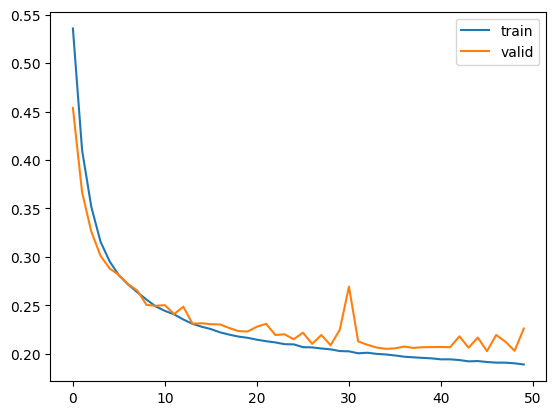

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

590/590 [==============================] - 1s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

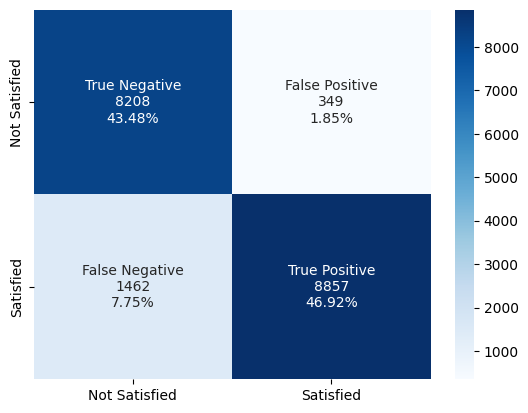

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model 2 FeatureSet 2 - Redundancy

##### This model seeks to remove seemingly identical values in some features to increase the variance in the data.

In [ ]:
# resplit data
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [ ]:
# drop ID column
X_train_var.drop(columns="ID", inplace=True)
X_test_var.drop(columns="ID", inplace=True)

In [ ]:
X_train_var.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
85573,Needs Improvement,Ordinary,Needs Improvement,Needs Improvement,Needs Improvement,Excellent,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Excellent


In [ ]:
X_test_var.head(1)

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
13485,Good,Green Car,Good,Good,Convenient,Good,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Acceptable,Good,Needs Improvement,Acceptable,Needs Improvement


In [ ]:
# One_hot_encoding and labelencoding:
OHE_list = ['Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering']

In [ ]:
X_train_var = pd.get_dummies(X_train_var, columns = ['Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering'], drop_first = False)
X_test_var = pd.get_dummies(X_test_var, columns = ['Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering'], drop_first = False)

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Platform_Location']= labelencoder_RE.fit_transform(X_train['Platform_Location'])
X_test_var['Platform_Location']= labelencoder_RE.transform(X_test['Platform_Location'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Onboard_Wifi_Service']= labelencoder_RE.fit_transform(X_train['Onboard_Wifi_Service'])
X_test_var['Onboard_Wifi_Service']= labelencoder_RE.transform(X_test['Onboard_Wifi_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Onboard_Entertainment']= labelencoder_RE.fit_transform(X_train['Onboard_Entertainment'])
X_test_var['Onboard_Entertainment']= labelencoder_RE.transform(X_test['Onboard_Entertainment'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Online_Support']= labelencoder_RE.fit_transform(X_train['Online_Support'])
X_test_var['Online_Support']= labelencoder_RE.transform(X_test['Online_Support'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Ease_of_Online_Booking']= labelencoder_RE.fit_transform(X_train['Ease_of_Online_Booking'])
X_test_var['Ease_of_Online_Booking']= labelencoder_RE.transform(X_test['Ease_of_Online_Booking'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Onboard_Service']= labelencoder_RE.fit_transform(X_train['Onboard_Service'])
X_test_var['Onboard_Service']= labelencoder_RE.transform(X_test['Onboard_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Legroom']= labelencoder_RE.fit_transform(X_train['Legroom'])
X_test_var['Legroom']= labelencoder_RE.transform(X_test['Legroom'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Baggage_Handling']= labelencoder_RE.fit_transform(X_train['Baggage_Handling'])
X_test_var['Baggage_Handling']= labelencoder_RE.transform(X_test['Baggage_Handling'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['CheckIn_Service']= labelencoder_RE.fit_transform(X_train['CheckIn_Service'])
X_test_var['CheckIn_Service']= labelencoder_RE.transform(X_test['CheckIn_Service'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Cleanliness']= labelencoder_RE.fit_transform(X_train['Cleanliness'])
X_test_var['Cleanliness']= labelencoder_RE.transform(X_test['Cleanliness'])

In [ ]:
labelencoder_RE = LabelEncoder()
X_train_var['Online_Boarding']= labelencoder_RE.fit_transform(X_train['Online_Boarding'])
X_test_var['Online_Boarding']= labelencoder_RE.transform(X_test['Online_Boarding'])

In [ ]:
X_train_var.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform_Location,75503.0,1.844602,1.364372,0.0,1.0,2.0,3.0,5.0
Onboard_Wifi_Service,75503.0,2.355178,1.746042,0.0,1.0,3.0,4.0,5.0
Onboard_Entertainment,75503.0,2.286174,1.619682,0.0,1.0,3.0,3.0,5.0
Online_Support,75503.0,2.299366,1.634646,0.0,1.0,3.0,3.0,5.0
Ease_of_Online_Booking,75503.0,2.317352,1.646982,0.0,1.0,3.0,4.0,5.0
Onboard_Service,75503.0,2.279618,1.610641,0.0,1.0,3.0,3.0,5.0
Legroom,75503.0,2.296703,1.619885,0.0,1.0,3.0,4.0,5.0
Baggage_Handling,75503.0,1.575553,1.091122,0.0,1.0,2.0,2.0,4.0
CheckIn_Service,75503.0,2.115664,1.760436,0.0,0.0,3.0,3.0,5.0
Cleanliness,75503.0,2.116472,1.524680,0.0,1.0,3.0,3.0,5.0


* Keep only Poor in Arrival Time Convenient, as all other values are roughly divided in half between S and NS.
* Delete Extremely Poor in Seat Comfort: A satisfied passenger is equally likely to choose Excellent.
* Keep one Seat Class
* Delete 'Extra Poor' in Catering as the ratio of satisfied to dissatisfied is the same as for Excellent.

In [ ]:
X_train_var.drop(columns=["Seat_Comfort_Extremely Poor","Seat_Class_Green Car","Arrival_Time_Convenient_Acceptable","Arrival_Time_Convenient_Excellent",
                          "Arrival_Time_Convenient_Extremely Poor","Arrival_Time_Convenient_Good","Arrival_Time_Convenient_Needs Improvement",
                          "Catering_Extremely Poor"], inplace=True)
X_test_var.drop(columns=["Seat_Comfort_Extremely Poor","Seat_Class_Green Car","Arrival_Time_Convenient_Acceptable","Arrival_Time_Convenient_Excellent",
                          "Arrival_Time_Convenient_Extremely Poor","Arrival_Time_Convenient_Good","Arrival_Time_Convenient_Needs Improvement",
                          "Catering_Extremely Poor"], inplace=True)

In [ ]:
X_train_var.head(1)

,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,...,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Good,Catering_Needs Improvement,Catering_Poor
85573,3,1,1,3,3,3,3,2,0,3,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
X_test_var.head(1)

,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,...,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Good,Catering_Needs Improvement,Catering_Poor
13485,0,3,4,4,0,0,0,2,4,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
###Checking the shape of train and test sets
print(X_train_var.shape)
print(X_test_var.shape)
print(y_train_var.shape)
print(y_test_var.shape)

(75503, 23)
(18876, 23)
(75503, 1)
(18876, 1)


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 23, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(X_train_var, y_train_var,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.4981 - accuracy: 0.7644 - val_loss: 0.4044 - val_accuracy: 0.8227
Epoch 2/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.8407 - val_loss: 0.4039 - val_accuracy: 0.8148
Epoch 3/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.8614 - val_loss: 0.3378 - val_accuracy: 0.8478
Epoch 4/50
1888/1888 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.8709 - val_loss: 0.3428 - val_accuracy: 0.8493
Epoch 5/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8789 - val_loss: 0.2757 - val_accuracy: 0.8803
Epoch 6/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.8825 - val_loss: 0.2695 - val_accuracy: 0.8832
Epoch 7/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.2630 - accuracy: 0.8880 - val_loss: 0.2754 - val_accuracy:

590/590 [==============================] - 1s 2ms/step - loss: 0.1951 - accuracy: 0.9130


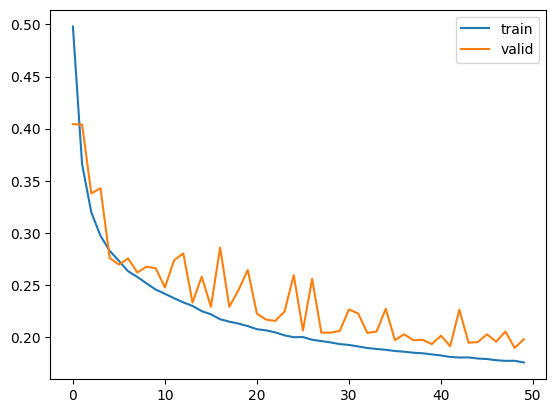

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_var, y_test_var)

In [ ]:
y_pred=model.predict(X_test_var)
y_pred = (y_pred > 0.5)
y_pred

590/590 [==============================] - 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

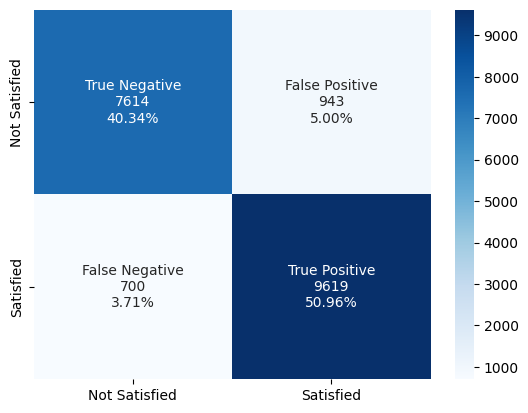

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_var, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Observations
By removing redundant values (where one group had similar fraction between values) of a feature, we were able to increase our accuracy by 1%. This is before hypertuning.

### Model 1 FeatureSet 3 - Weight

this feature set deletes values where the weight is less than 80-20 split between target values.

# Conclusions and Recommendations

Satisfaction was roughly divided between satisfied and unsatisfied. There did not appear to be a strong distinction between whether a person was happy with their trip. This led to a deeper dive into possible variables that might have had a stronger influence on the vote than others.

Very few people rated the **Seat_Comfort** as Extremely Poor. However, of the other options, **Excellent** received the least votes, with most divided between Needs_Improvement, Acceptable, and Good.

### Recommendations
The company may consider upgrades to their general seating to increase the satisfaction level of passengers. As travel involves "sitting" as a primary activity, it may be an important variable to perceived travel experience.

Other models may provide additional insights and will be tested, including logistic regression (Classif.-> HR Employee example) and decision trees, which will highlight the most important features. Principle Component Analysis (PCA) feature selection would reduce the number of features and select for most relevant features. Feature engineering tools could help further refine and increase variance in the data.